# example e1 simple energyplus
Run a building performance simulation with the EnergyPlus backend.

This example runs a BPS with the EnergyPlus backend. Specifies project
directory and location of the IFC file. Then, it creates a bim2sim
project with the EnergyPlus backend. Simulation settings are specified
(EnergyPlus location needs to be specified according to your system,
other settings are set to default if not specified otherwise),
before the project is executed with the previously specified settings.

## code

import needed libraries

In [1]:
import tempfile
from pathlib import Path

import bim2sim
from bim2sim import Project, run_project, ConsoleDecisionHandler
from bim2sim.utilities.types import IFCDomain


Create a temp directory for the project, feel free to use a "normal" directory

In [2]:
project_path = Path(
    tempfile.TemporaryDirectory(prefix='bim2sim_example1').name)
print(project_path)

C:\Users\dja\AppData\Local\Temp\bim2sim_example11iyd_r1x


Set the ifc path to use and define which domain the IFC belongs to

In [3]:
ifc_paths = {
    IFCDomain.arch:
        Path(bim2sim.__file__).parent.parent /
        'test/resources/arch/ifc/AC20-FZK-Haus.ifc',
}

Create a project including the folder structure for the project with energyplus as backend

In [4]:
project = Project.create(project_path, ifc_paths, 'energyplus')

[DEV-INFO] - 2025-05-07 15:36:01,411  bim2sim.create: Project folder created.
[DEV-INFO] - 2025-05-07 15:36:01,417  bim2sim.kernel.decision.load: Unable to load decisions. No Existing decisions found at C:\Users\dja\AppData\Local\Temp\bim2sim_example11iyd_r1x\decisions.json
[DEV-INFO] - 2025-05-07 15:36:01,728  bim2sim.plugins.load_plugin: Loaded Plugin EnergyPlus
[DEV-INFO] - 2025-05-07 15:36:01,730  bim2sim.sim_settings.check_setting_config: No min_value given for sim_setting <bim2sim.sim_settings.NumberSetting object at 0x000002393CA83250>, assumingsmallest float epsilon.
[DEV-INFO] - 2025-05-07 15:36:01,732  bim2sim.sim_settings.check_setting_config: No min_value given for sim_setting <bim2sim.sim_settings.NumberSetting object at 0x000002393CA83690>, assumingsmallest float epsilon.
[DEV-INFO] - 2025-05-07 15:36:01,735  bim2sim.sim_settings.update_from_config: Loaded 0 settings from config file.


set weather file data

In [5]:
project.sim_settings.weather_file_path = (
        Path(bim2sim.__file__).parent.parent /
        'test/resources/weather_files/DEU_NW_Aachen.105010_TMYx.epw')

Set the install path to your EnergyPlus installation according to your system requirements

In [6]:
# project.sim_settings.ep_install_path = 'C://EnergyPlusV9-4-0/'

run annual simulation for EnergyPlus

In [7]:
project.sim_settings.run_full_simulation = True

Set other simulation settings, otherwise all settings are set to default



In [ ]:
project.sim_settings.cooling_tz_overwrite = True

create plots based on the results after simulation

In [9]:
project.sim_settings.create_plots = True

Run the project with the ConsoleDecisionHandler. This allows interactive input to answer upcoming questions regarding the imported IFC.

[DEV-INFO] - 2025-05-07 15:37:03,665  bim2sim.Playground.run_task: Starting Task '<Task (LoadIFC)>'
[DEV-INFO] - 2025-05-07 15:37:03,667  bim2sim.tasks.base.LoadIFC.run: Loading IFC files
[DEV-INFO] - 2025-05-07 15:37:03,670  bim2sim.tasks.base.LoadIFC.load_ifc_files: Found 1 IFC files in project directory.
[DEV-INFO] - 2025-05-07 15:37:03,671  bim2sim.tasks.base.LoadIFC.load_ifc_files: Loading IFC file AC20-FZK-Haus.ifc 1/1.
[DEV-INFO] - 2025-05-07 15:37:03,672  bim2sim.load_ifc: Loading IFC AC20-FZK-Haus.ifc from C:\Users\dja\AppData\Local\Temp\bim2sim_example11iyd_r1x\ifc\arch\AC20-FZK-Haus.ifc
[DEV-INFO] - 2025-05-07 15:37:03,937  bim2sim.kernel.ifc_file.get_ifc_units: Initializing units for IFC file: AC20-FZK-Haus.ifc
[DEV-WARNING] - 2025-05-07 15:37:03,966  bim2sim.kernel.ifc_file.get_ifc_units: Failed to parse #19=IfcConversionBasedUnit(#18,.PLANEANGLEUNIT.,'DEGREE',#17)
[DEV-WARNING] - 2025-05-07 15:37:03,967  bim2sim.kernel.ifc_file.get_ifc_units: Failed to parse #27=IfcDerive


C:\EnergyPlusV9-4-0\energyplus.exe --weather D:\02_Git\bim2sim\test\resources\weather_files\DEU_NW_Aachen.105010_TMYx.epw --output-directory C:\Users\dja\AppData\Local\Temp\bim2sim_example11iyd_r1x\export\EnergyPlus\SimResults\AC20-FZK-Haus --annual --expandobjects --readvars --idd C:\EnergyPlusV9-4-0\Energy+.idd C:\Users\dja\AppData\Local\Temp\bim2sim_example11iyd_r1x\export\EnergyPlus\SimResults\AC20-FZK-Haus\AC20-FZK-Haus_ed0f99.idf



[DEV-INFO] - 2025-05-07 15:37:32,801  bim2sim.tasks.base.RunEnergyPlusSimulation.run: Simulation successfully finished.
[DEV-INFO] - 2025-05-07 15:37:34,109  bim2sim.tasks.base.RunEnergyPlusSimulation.run: Exported dataframe for postprocessing.
[DEV-INFO] - 2025-05-07 15:37:34,110  bim2sim.tasks.base.RunEnergyPlusSimulation.run: You can find the results under C:\Users\dja\AppData\Local\Temp\bim2sim_example11iyd_r1x\export\EnergyPlus\SimResults\AC20-FZK-Haus
[DEV-INFO] - 2025-05-07 15:37:34,110  bim2sim.Playground.run_task: Successfully finished Task '<Task (RunEnergyPlusSimulation)>'
[DEV-INFO] - 2025-05-07 15:37:34,113  bim2sim.Playground.run_task: <Task (RunEnergyPlusSimulation)> done
[DEV-INFO] - 2025-05-07 15:37:34,114  bim2sim.Playground.run_task: Starting Task '<Task (CreateResultDF)>'
[DEV-INFO] - 2025-05-07 15:37:35,617  bim2sim.Playground.run_task: Successfully finished Task '<Task (CreateResultDF)>'
[DEV-INFO] - 2025-05-07 15:37:35,618  bim2sim.Playground.run_task: <Task (Cre

0

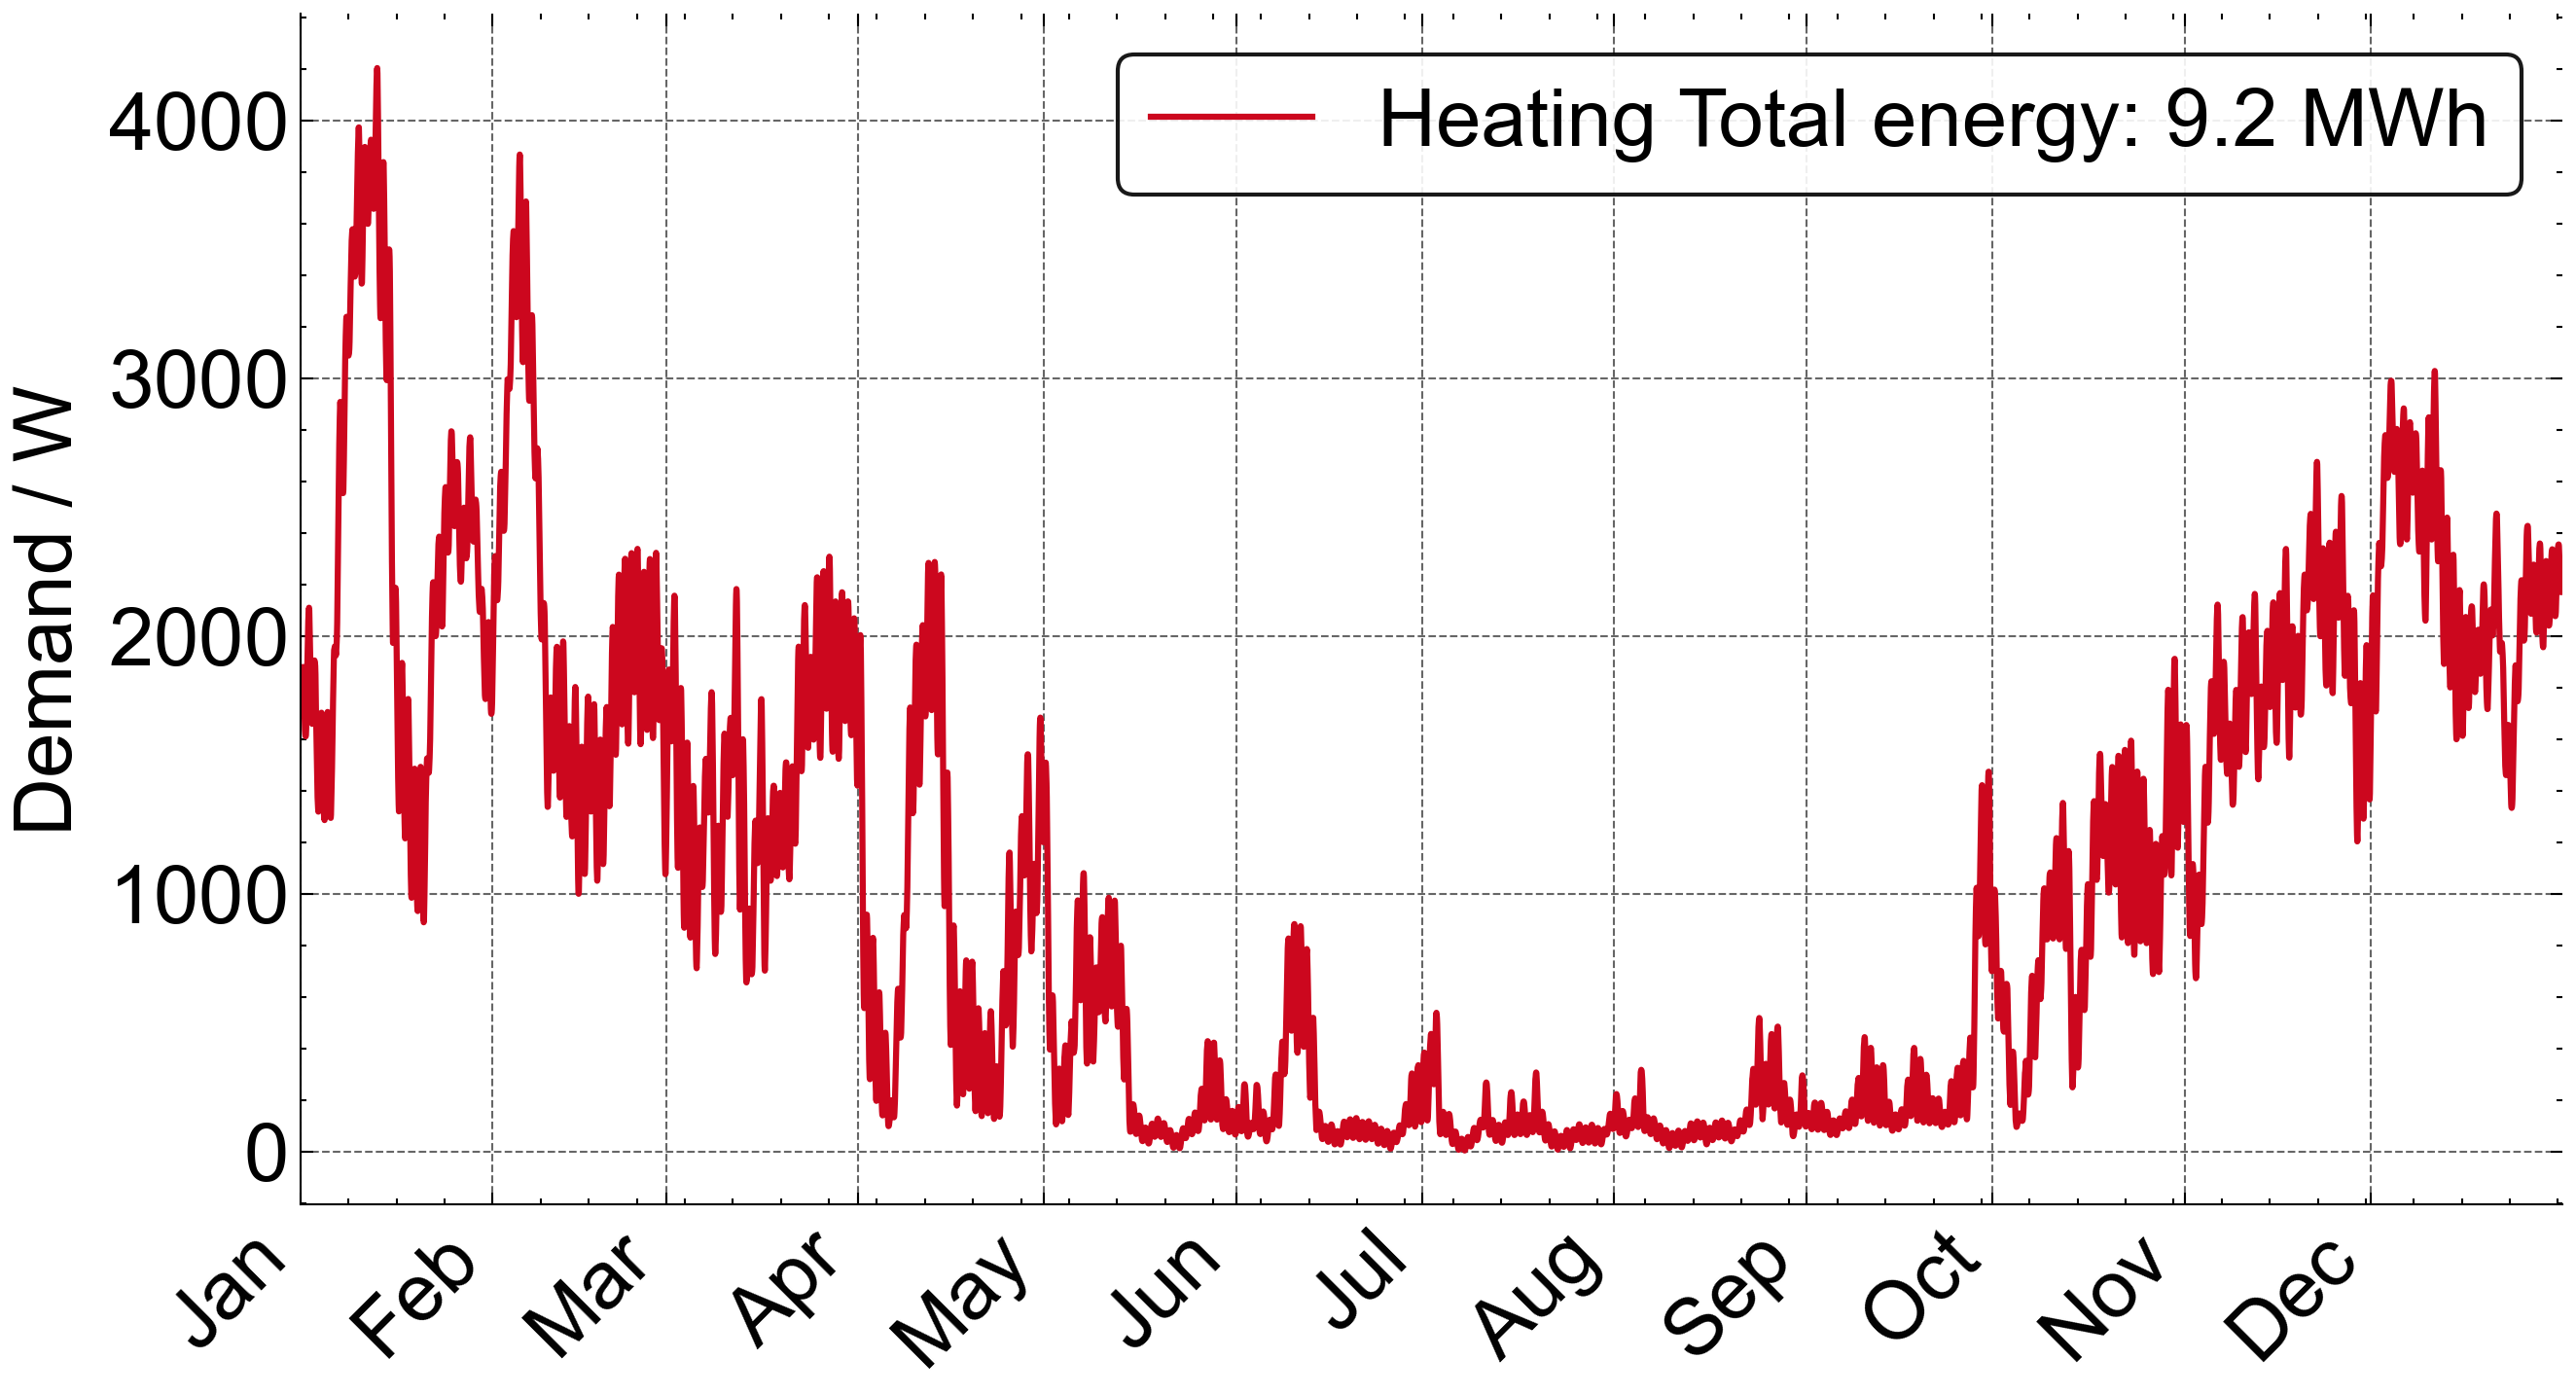

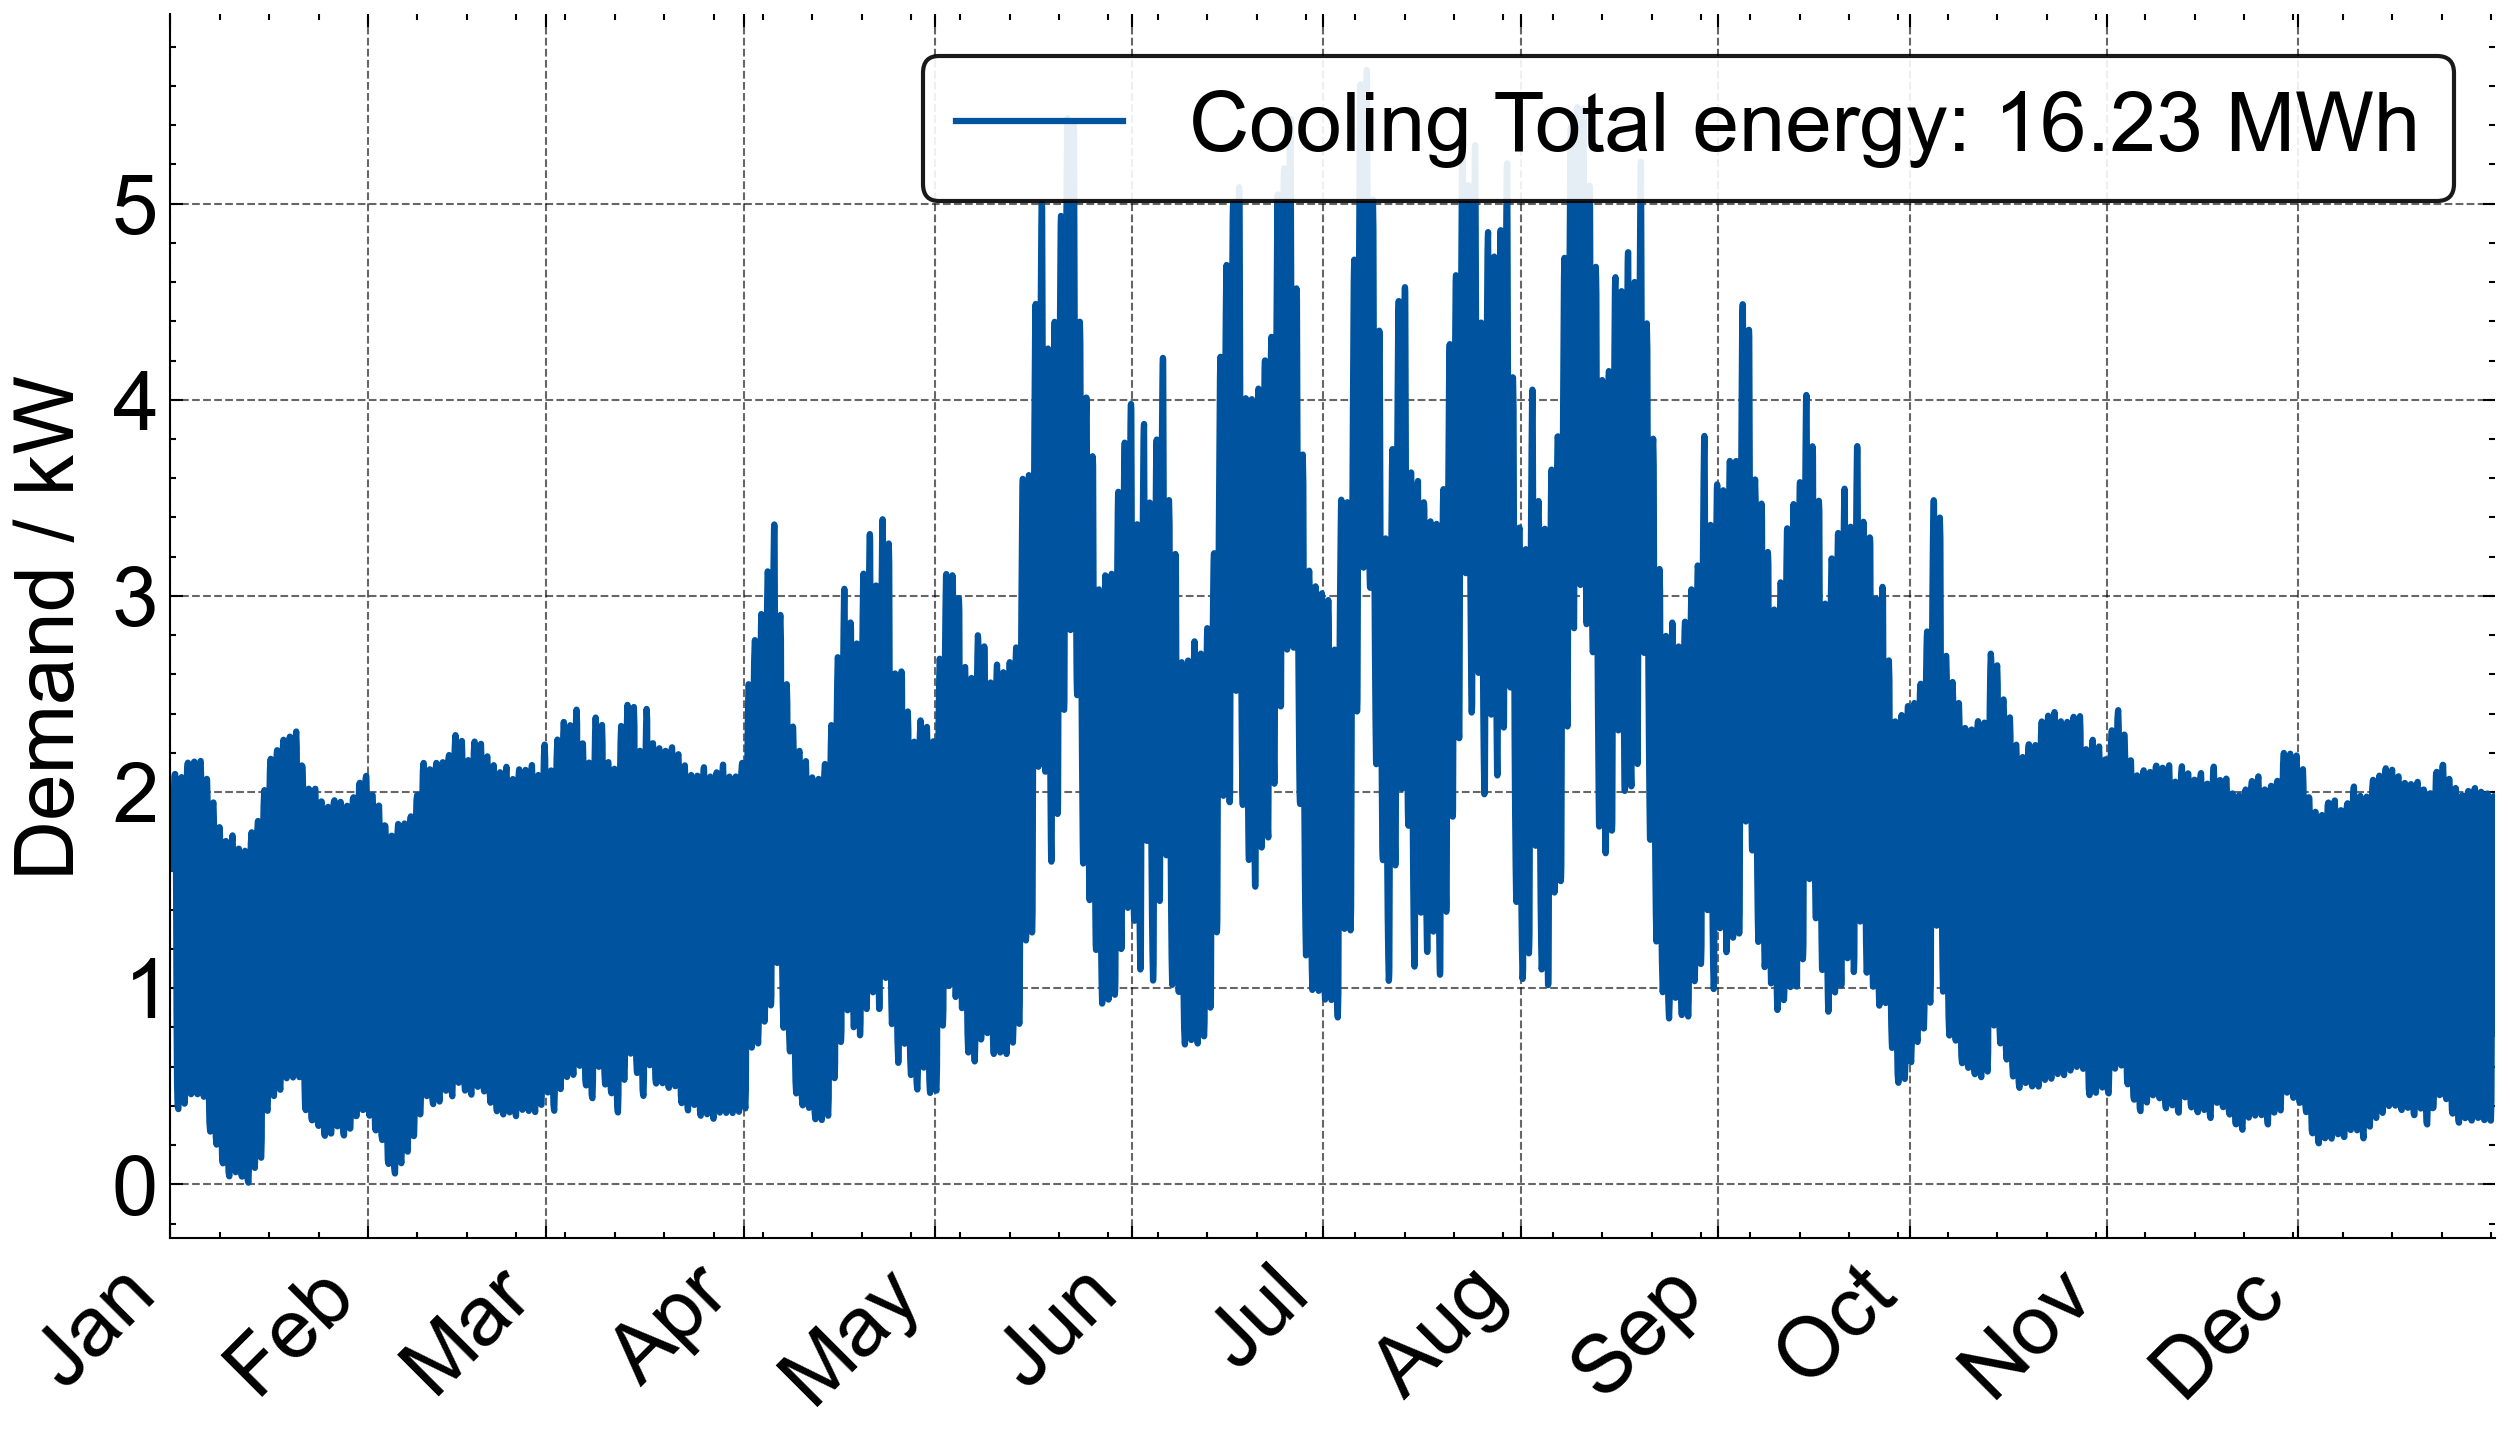

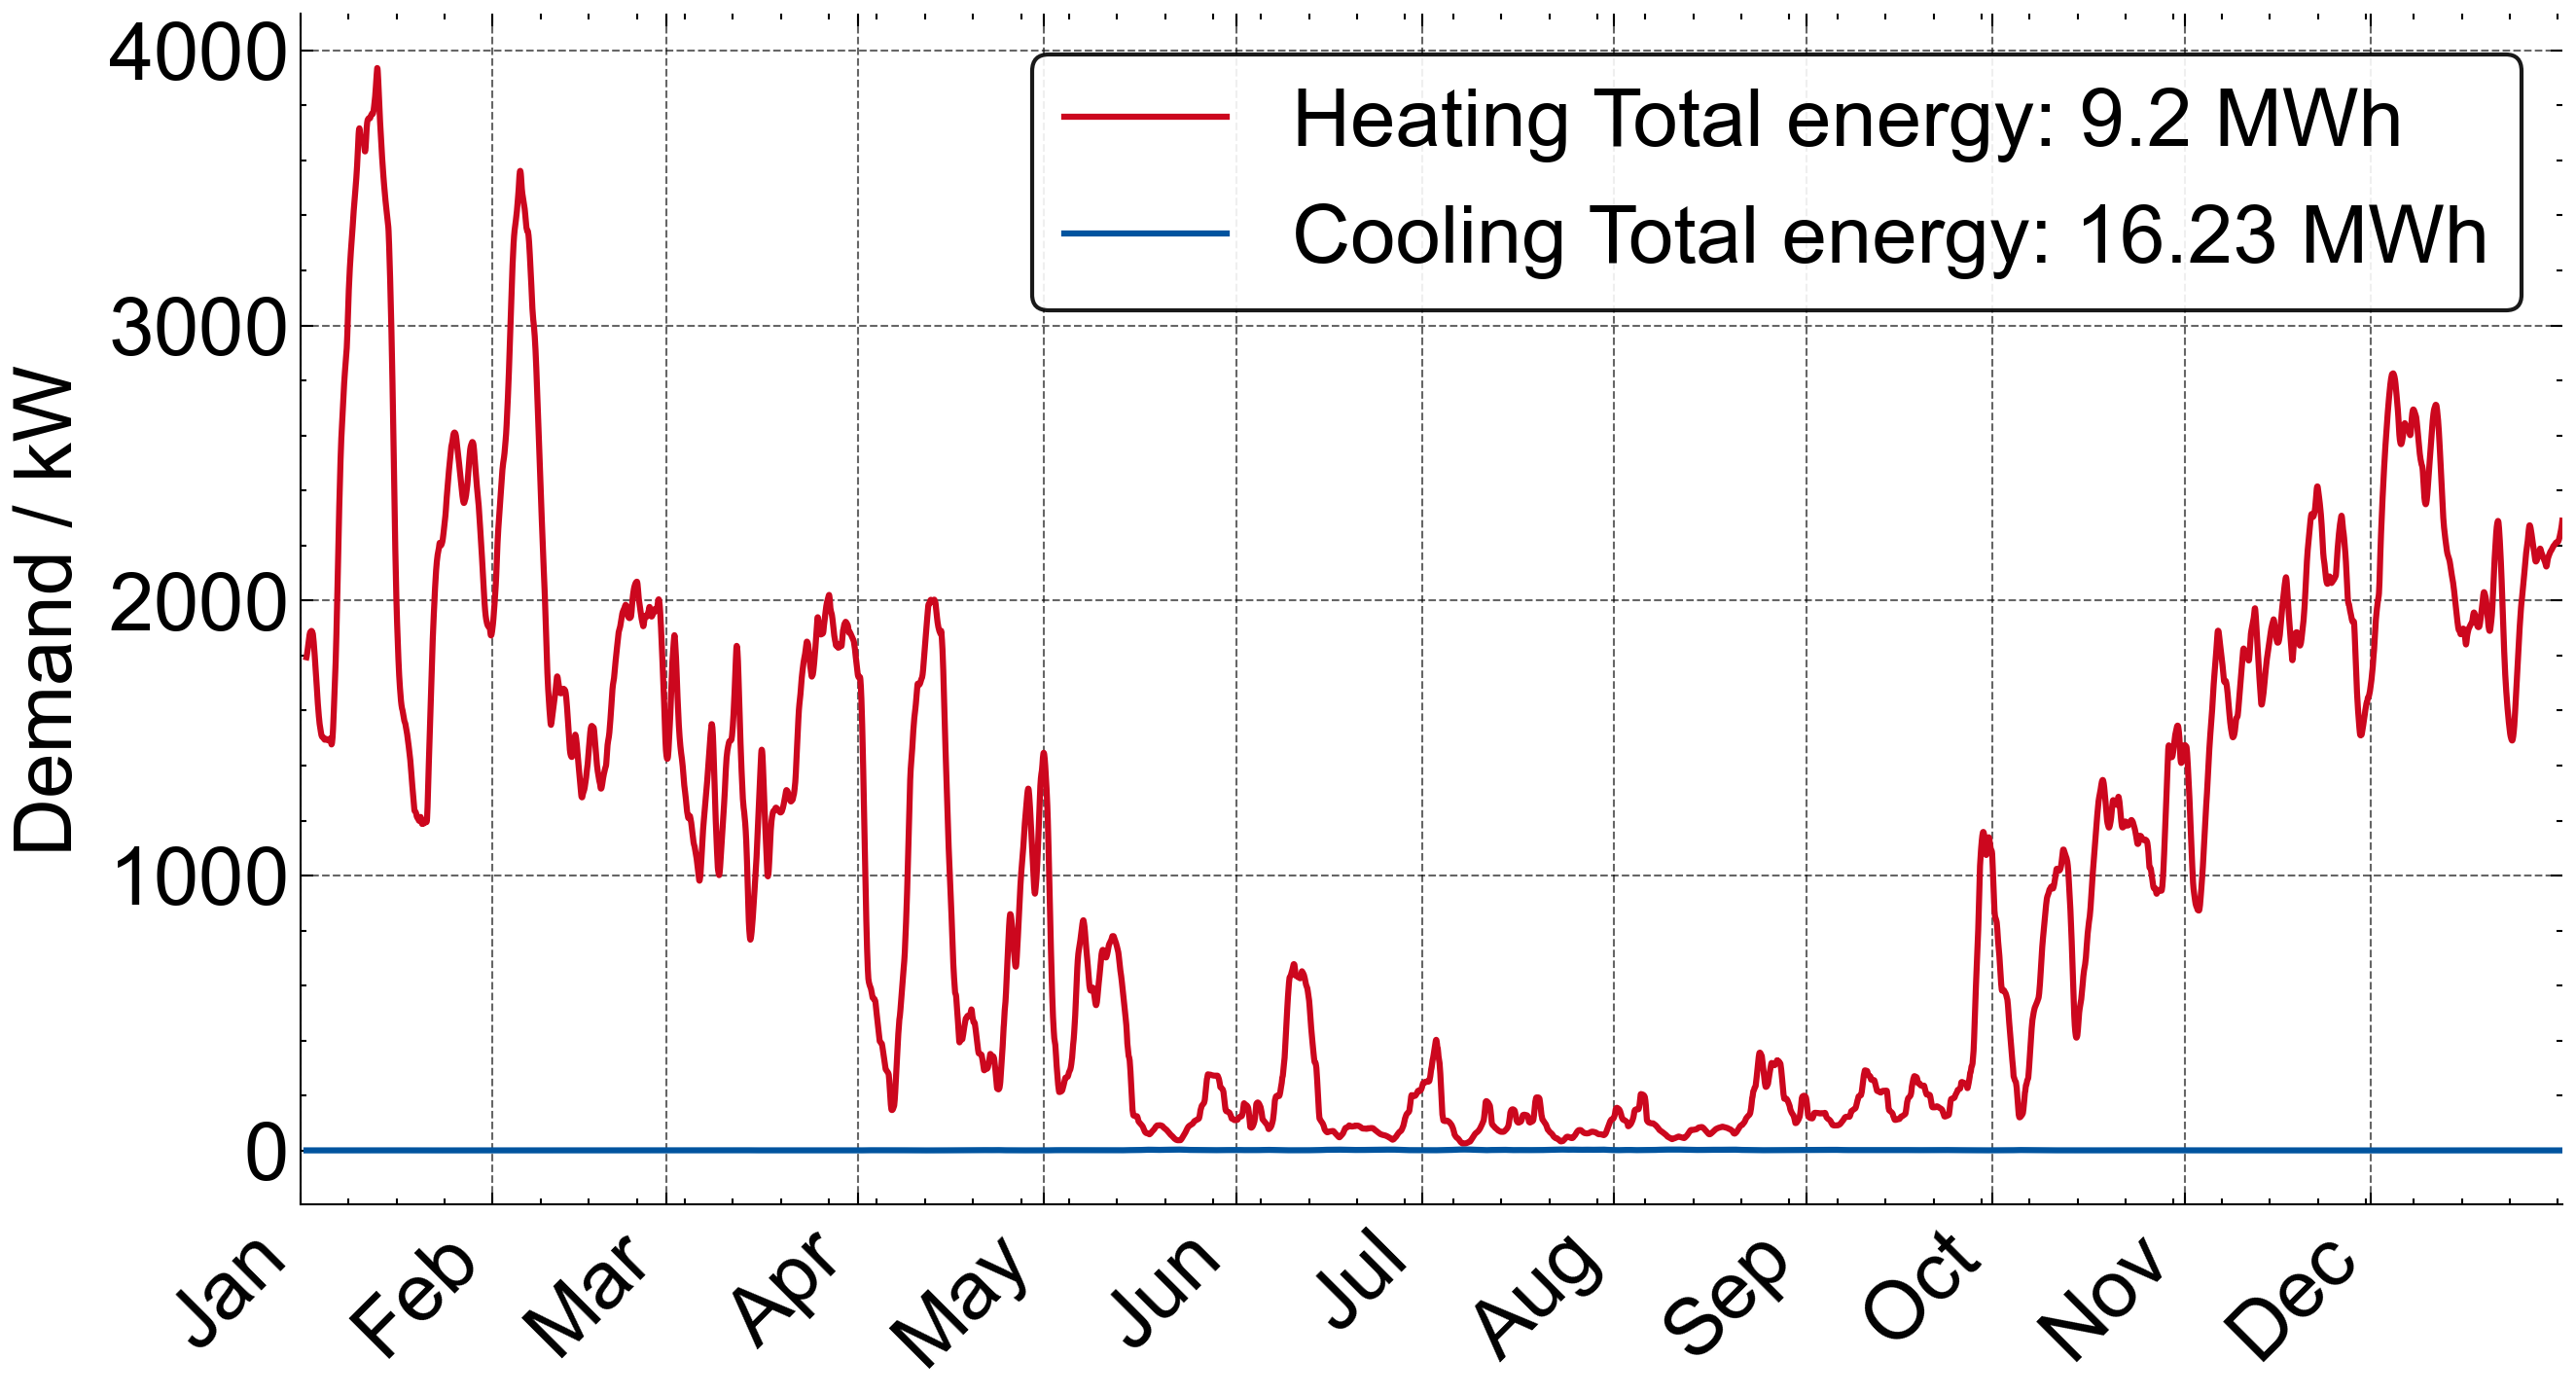

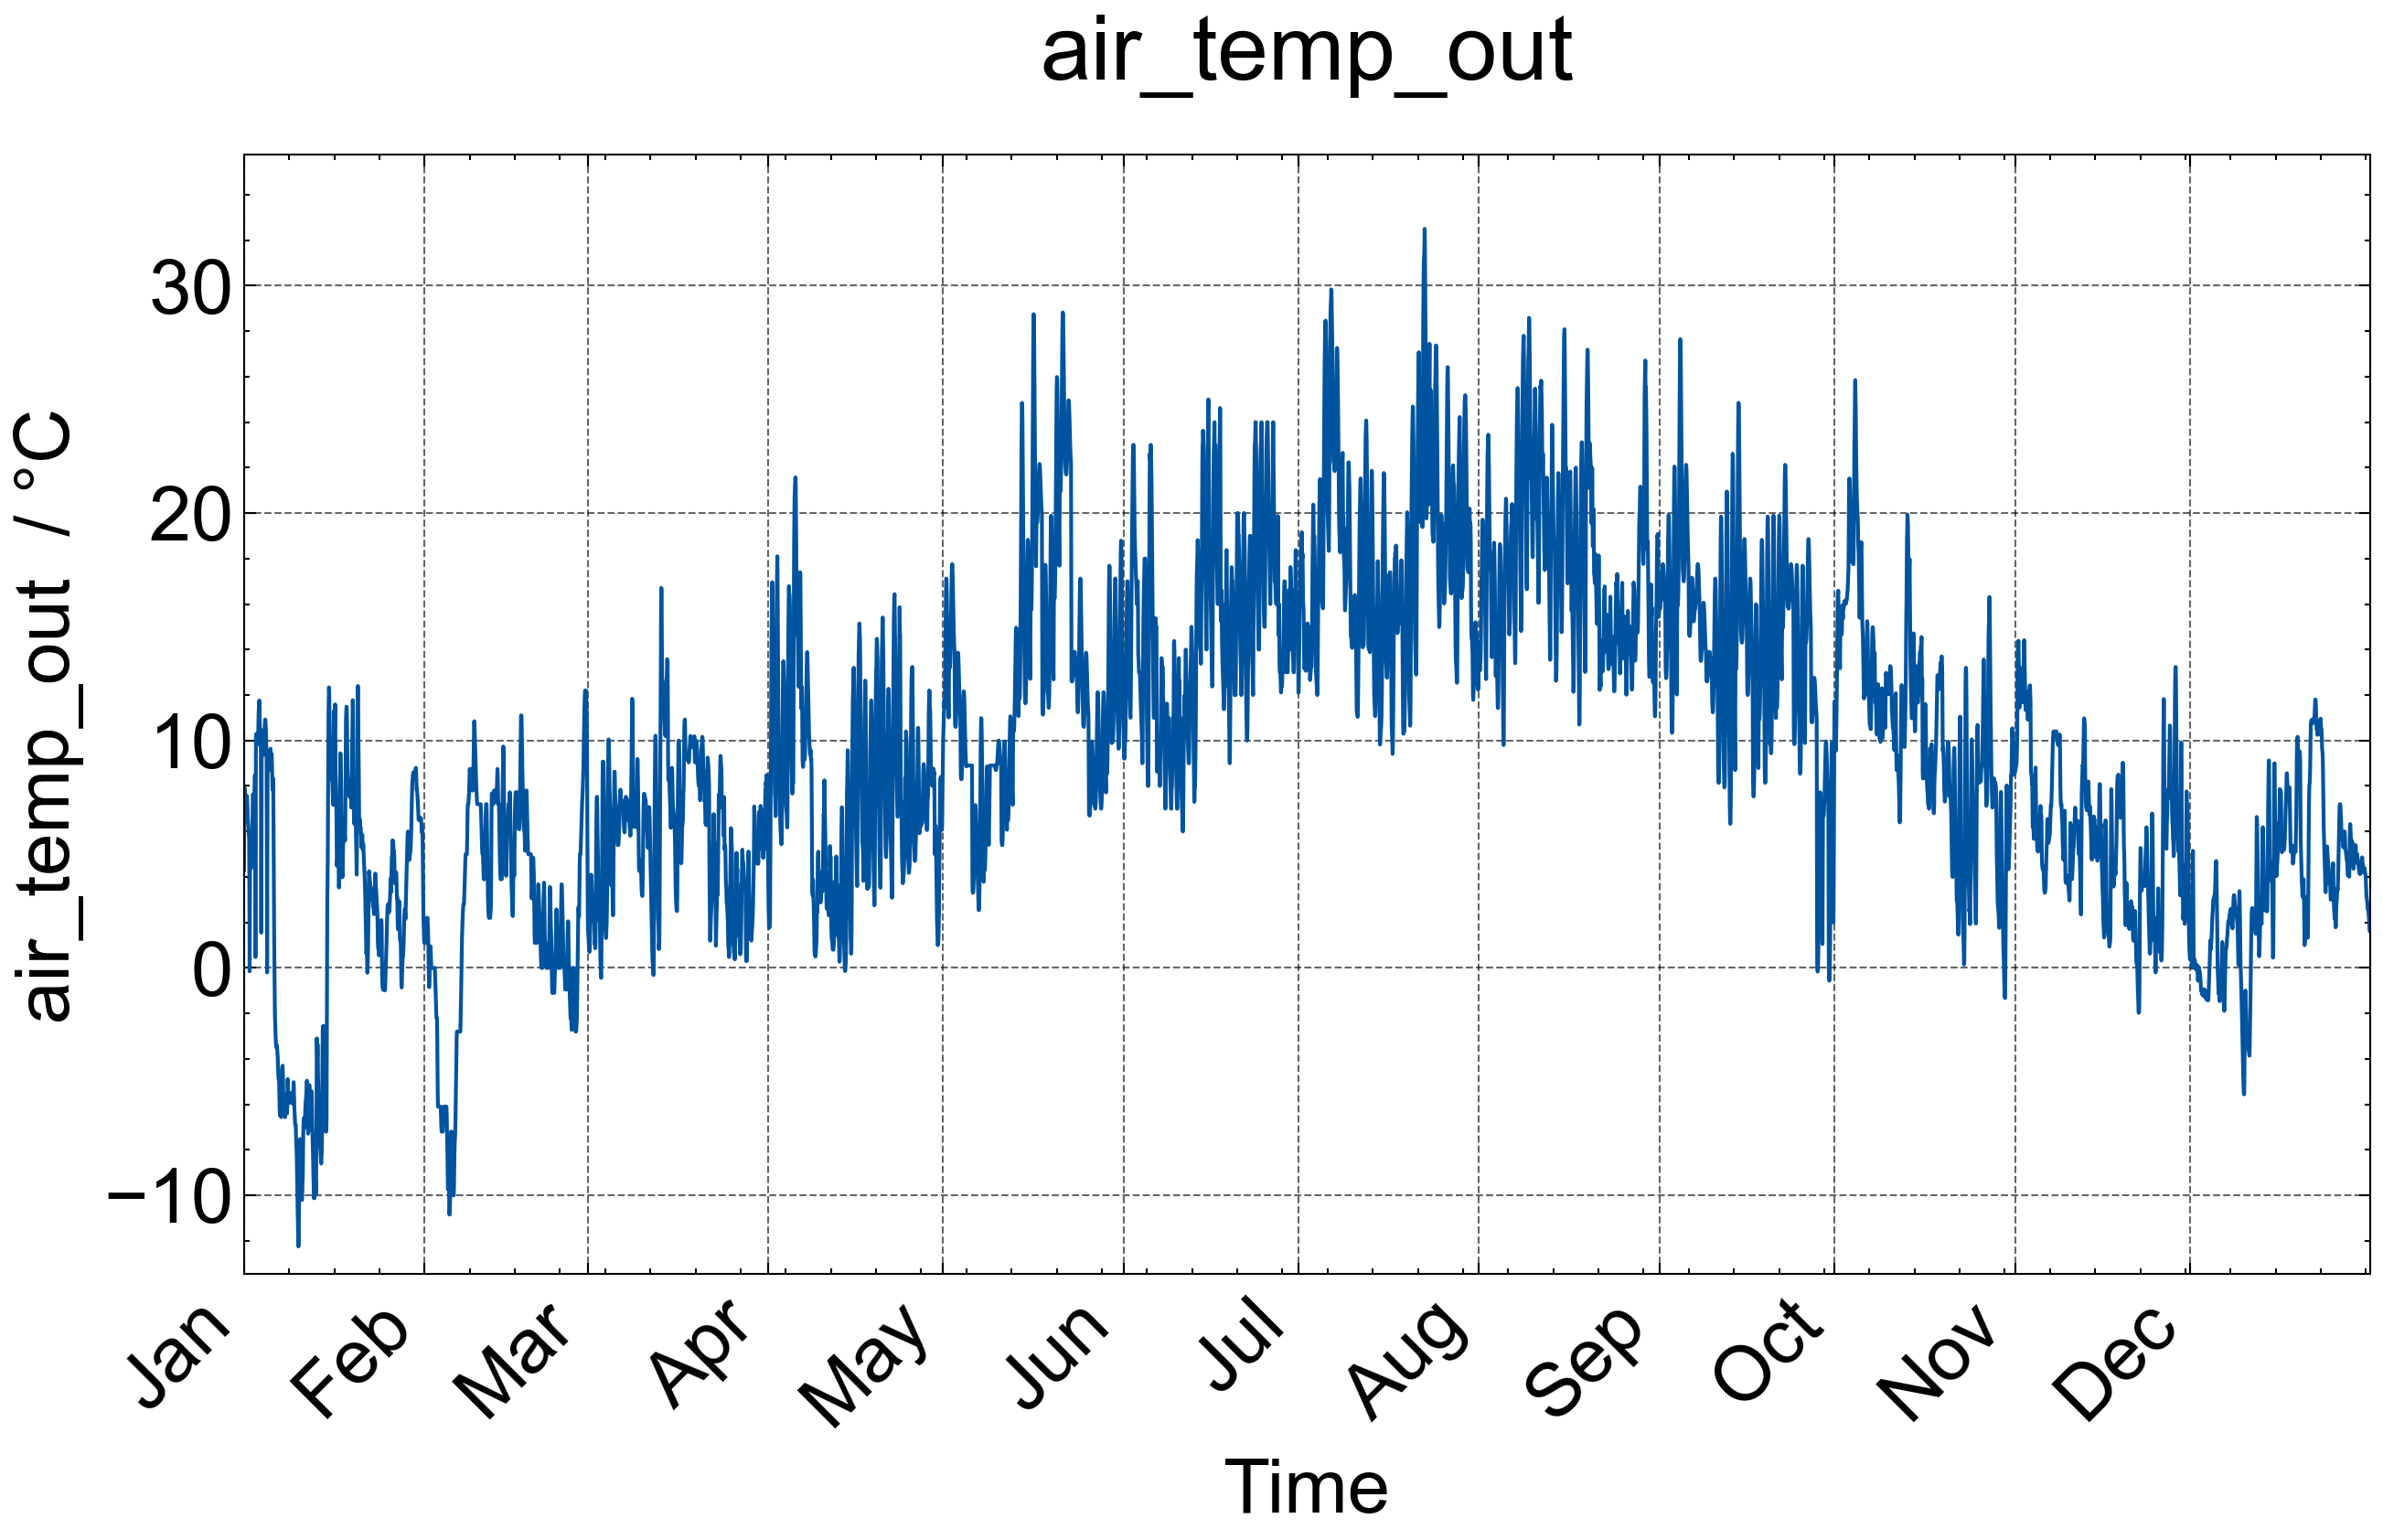

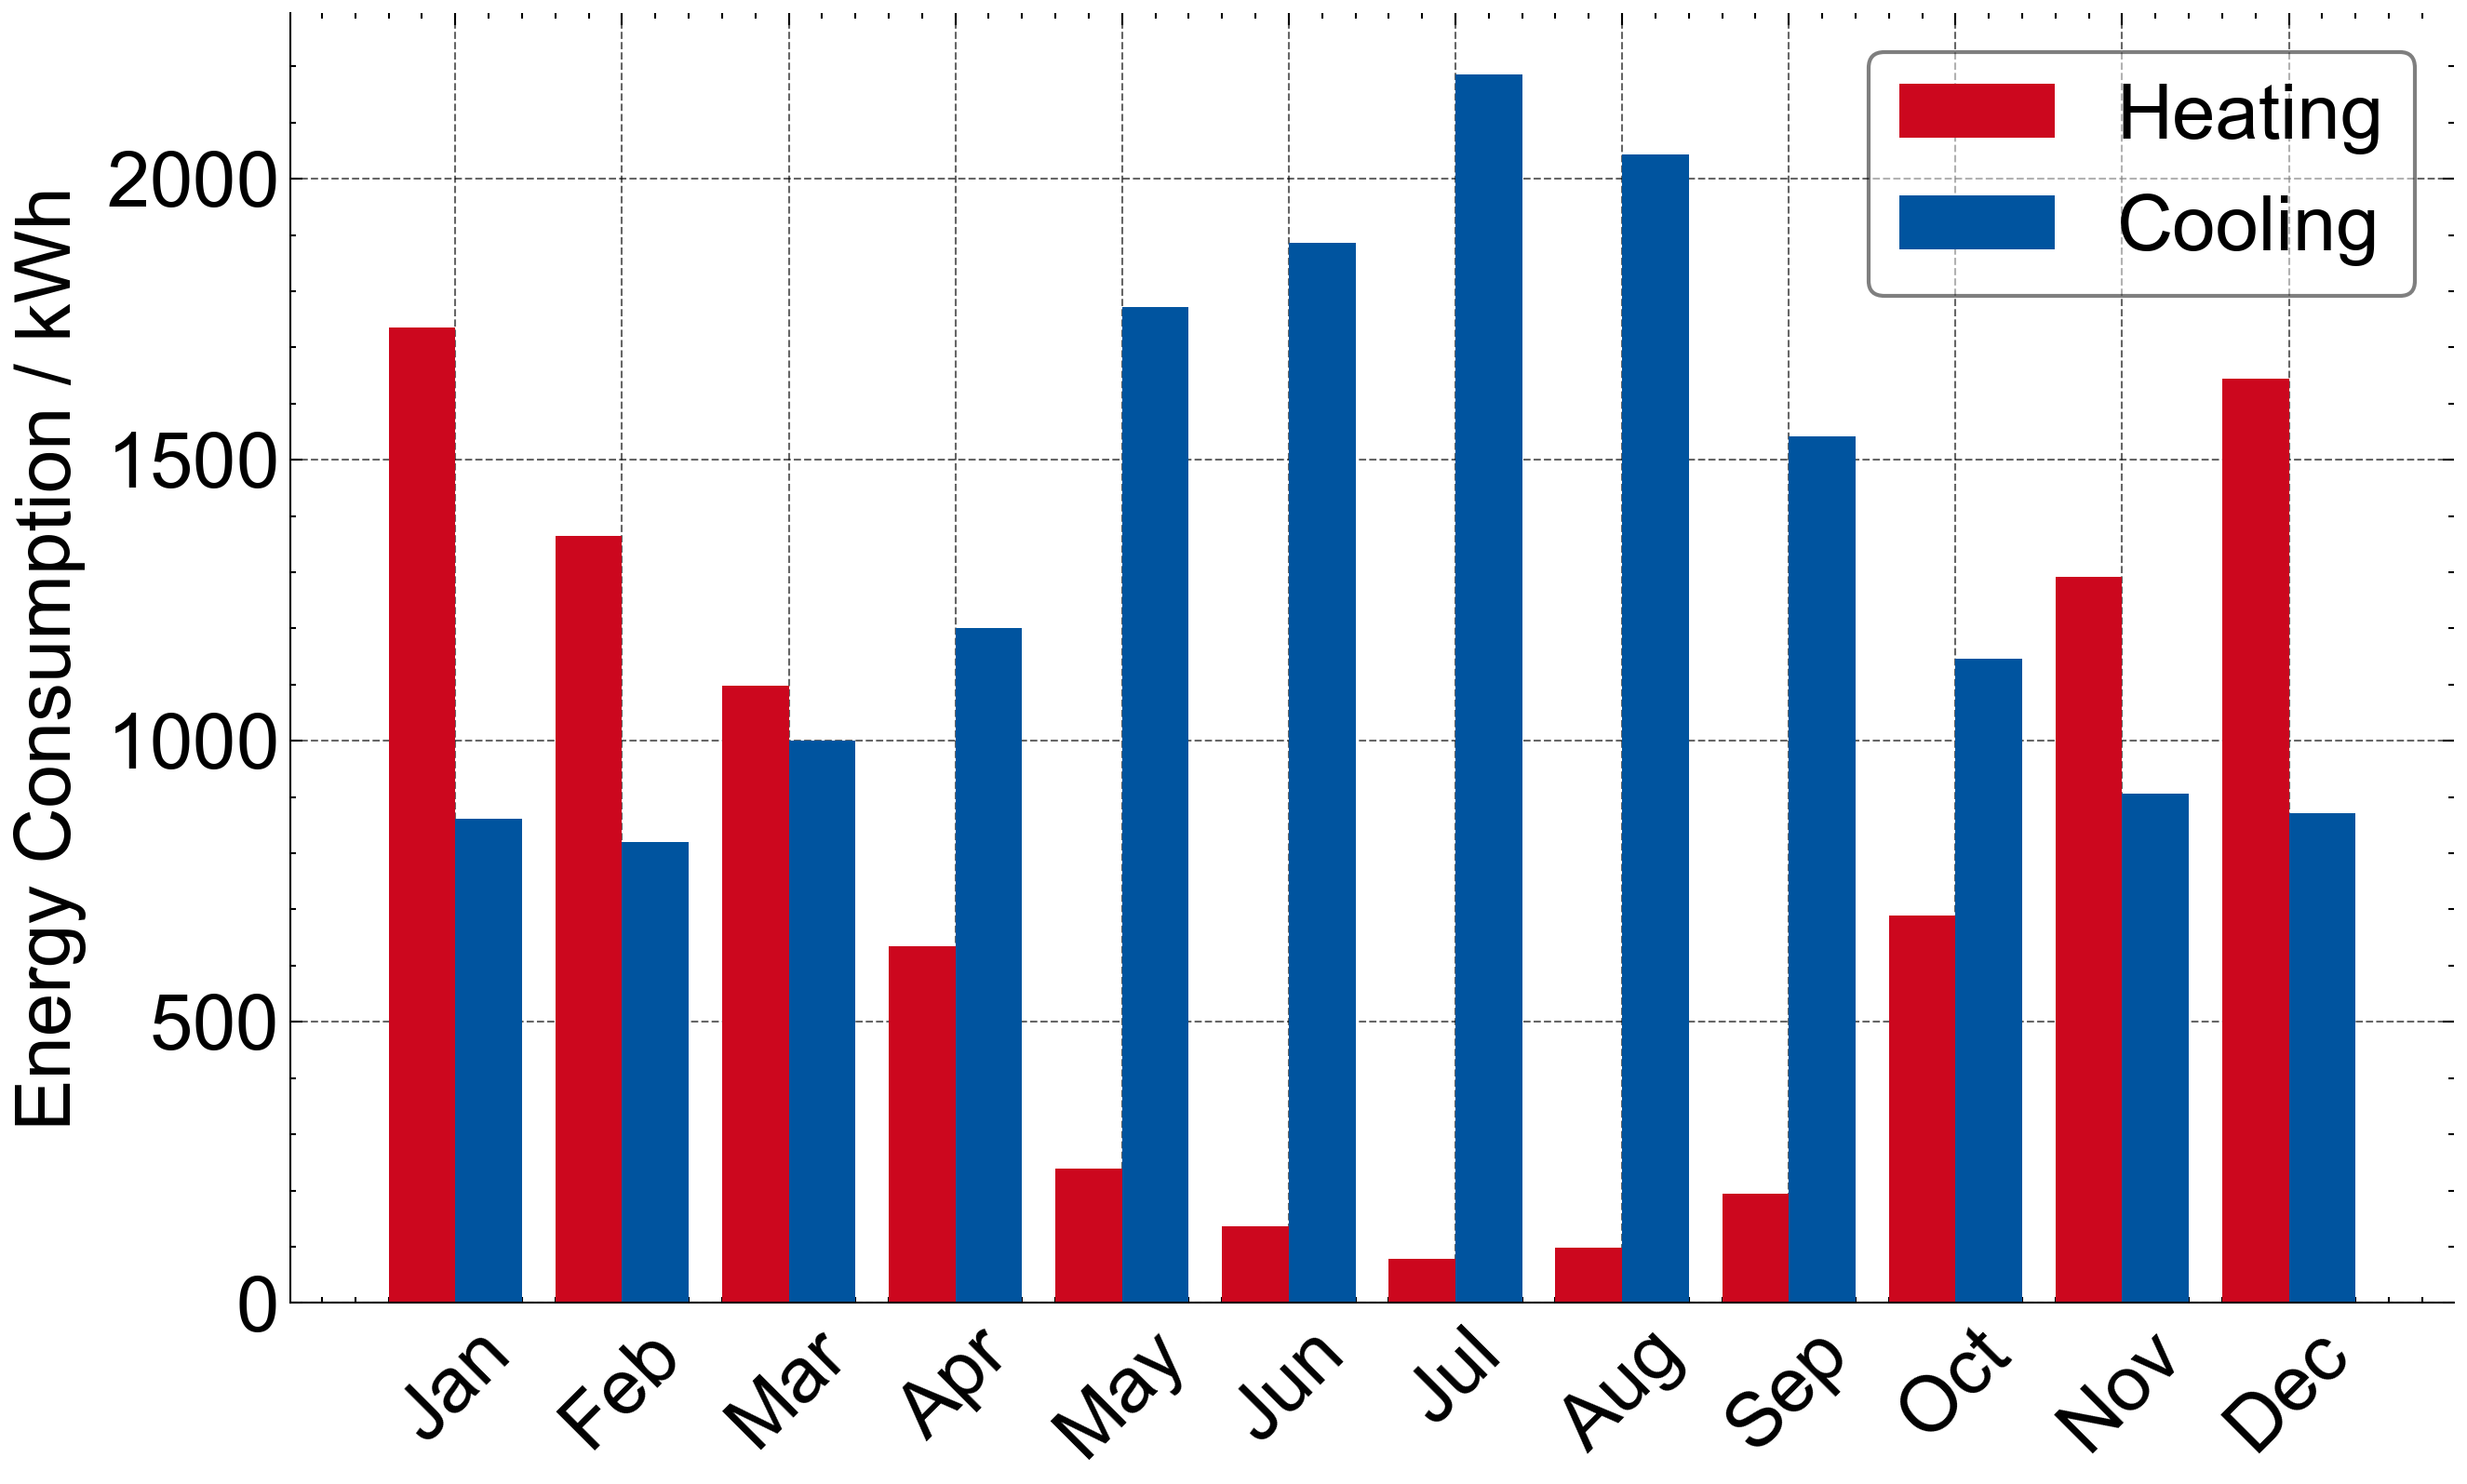

In [10]:
run_project(project, ConsoleDecisionHandler())

### plot files
- files are stored in the project folder
  - [/tmp/bim2sim_example1yo87g2xb]/export/EnergyPlus/SimResults/AC20-FZK-Haus/plots